KNN(K-최근접 이웃 알고리즘)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
A_x_list = [0,2,4,1,1,4]
A_y_list = [4,1,5,5,2,6]
A_x = np.array(A_x_list)
A_y = np.array(A_y_list)
 
B_x_list = [7,7,5,7,10,9]
B_y_list = [4,0,2,2,3,3]
B_x = np.array(B_x_list)
B_y = np.array(B_y_list)

In [29]:
finding_point = [5,4]

<IPython.core.display.Javascript object>


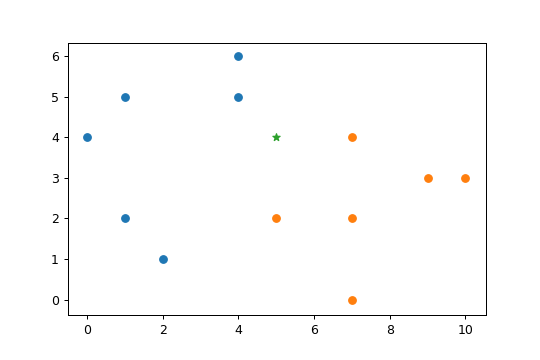

In [30]:
plt.figure()
plt.scatter(A_x,A_y)
plt.scatter(B_x,B_y)
plt.scatter(finding_point[0],finding_point[1], marker='*')
 
plt.show()

In [19]:
# L리스트에서 c번째 작은 값 찾는 함수
def count_min_value(L,c):
    temp = L.copy()
    temp.sort()
    item = temp[c-1]
    return L.index(item),item
 
# 입력값이 A그룹인지 B그룹인지 찾는 함수::KNN Algorithm 적용
def finding_AorB(k,x,y):
    numA = 0
    numB = 0
    A_xy = []
    B_xy = []
    # x,y 좌표가 따로 있는 것을 하나의 리스트로 통합
    for i in range(len(A_x_list)):
        A_xy.append([A_x_list[i],A_y_list[i]])
    for i in range(len(B_x_list)):
        B_xy.append([B_x_list[i],B_y_list[i]])
 
    A_distance = []
    B_distance = []
    # x,y 좌표에 대해 입력값과의 거리 산출
    for each in A_xy:
        dis = ((each[0] - x)**2 + (each[1] - y)**2)**(1/2)
        A_distance.append(dis)
    for each in B_xy:
        dis = ((each[0] - x)**2 + (each[1] - y)**2)**(1/2)
        B_distance.append(dis)
    A_result = []
    B_result = []
    
    A_min_count = 1
    B_min_count = 1
    while(numA + numB < k):
        min_A = 99999
        min_B = 99999
 
        _, min_A = count_min_value(A_distance,A_min_count)
        _, min_B = count_min_value(B_distance,B_min_count)
 
        if min_A < min_B:
            numA += 1
            A_min_count += 1
            A_result.append(A_xy[A_distance.index(min_A)])
            A_distance[A_distance.index(min_A)] = -1
        elif min_A > min_B:
            numB += 1
            B_min_count += 1
            B_result.append(B_xy[B_distance.index(min_B)])
            B_distance[B_distance.index(min_B)] = -1
        elif min_A == min_B:
            numA += 1
            numB += 1
            A_min_count += 1
            B_min_count += 1
            A_result.append(A_xy[A_distance.index(min_A)])
            A_distance[A_distance.index(min_A)] = -1
            B_result.append(B_xy[B_distance.index(min_B)])
            B_distance[B_distance.index(min_B)] = -1
    if numA > numB:
        print("RESULT: The point is A")
    elif numA < numB:
        print("RESULT, The point is B")
    elif numA == numB:
        print("I DON'T KNOW")
    print("A point is",A_result,"\nB point is",B_result,"\n")

In [57]:
for k in range(1, 5):
    print(f'k={k}')
    finding_AorB(k,finding_point[0],finding_point[1])

k=1
RESULT: The point is A
A point is [[4, 5]] 
B point is [] 

k=2
I DON'T KNOW
A point is [[4, 5]] 
B point is [[7, 4]] 

k=3
RESULT, The point is B
A point is [[4, 5]] 
B point is [[7, 4], [5, 2]] 

k=4
I DON'T KNOW
A point is [[4, 5], [4, 6]] 
B point is [[7, 4], [5, 2]] 

